In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
# This is to avoid OMP_NUM_THREADS warning in K Means clustering 
os.environ["OMP_NUM_THREADS"] = '1'


In [2]:
os.chdir ('C:\\Noble\\Training\\KODO\\2025\Dec 2025\\Dec 2025 Day 10\\')

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
display (dataset)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x = dataset.iloc[:,[3,4]].values
print (x)


[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [6]:
from sklearn.cluster import KMeans 
wcss = []
for i in range(2,11):
    kmeans = KMeans (n_clusters =  i , init = 'k-means++',n_init =10)
    kmeans.fit(x)
    wcss.append (kmeans.inertia_)
display (wcss)


[181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30273.394312070028,
 25011.839349156595,
 21818.11458845217,
 20319.570042035262]

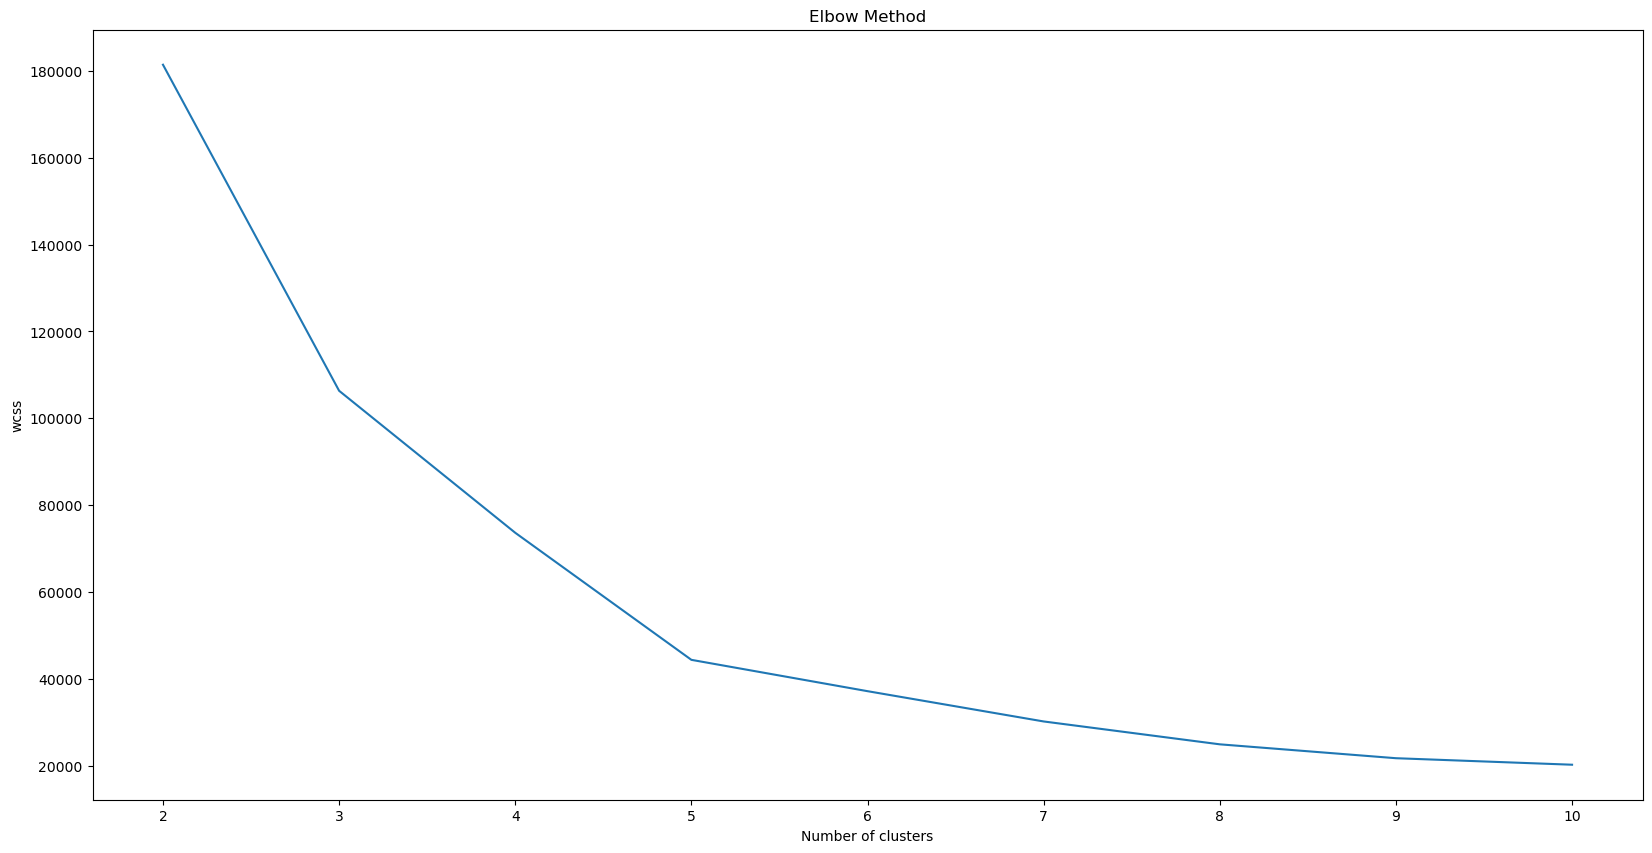

In [7]:
plt.figure(figsize=(20, 10))
plt.plot (range(2,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel ('wcss')
plt.show()


In [8]:

kmeans =  KMeans (n_clusters =  5 , init = 'k-means++',n_init =100)
kmeans = kmeans.fit(x)
y_kmeans = kmeans.labels_
print('Number of Records in each Cluster', display (pd.DataFrame(y_kmeans).value_counts()))
display (y_kmeans)


0
4    81
2    39
0    35
3    23
1    22
Name: count, dtype: int64

Number of Records in each Cluster None


array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

0
4    81
2    39
0    35
3    23
1    22
Name: count, dtype: int64

Number of Records in each Cluster None


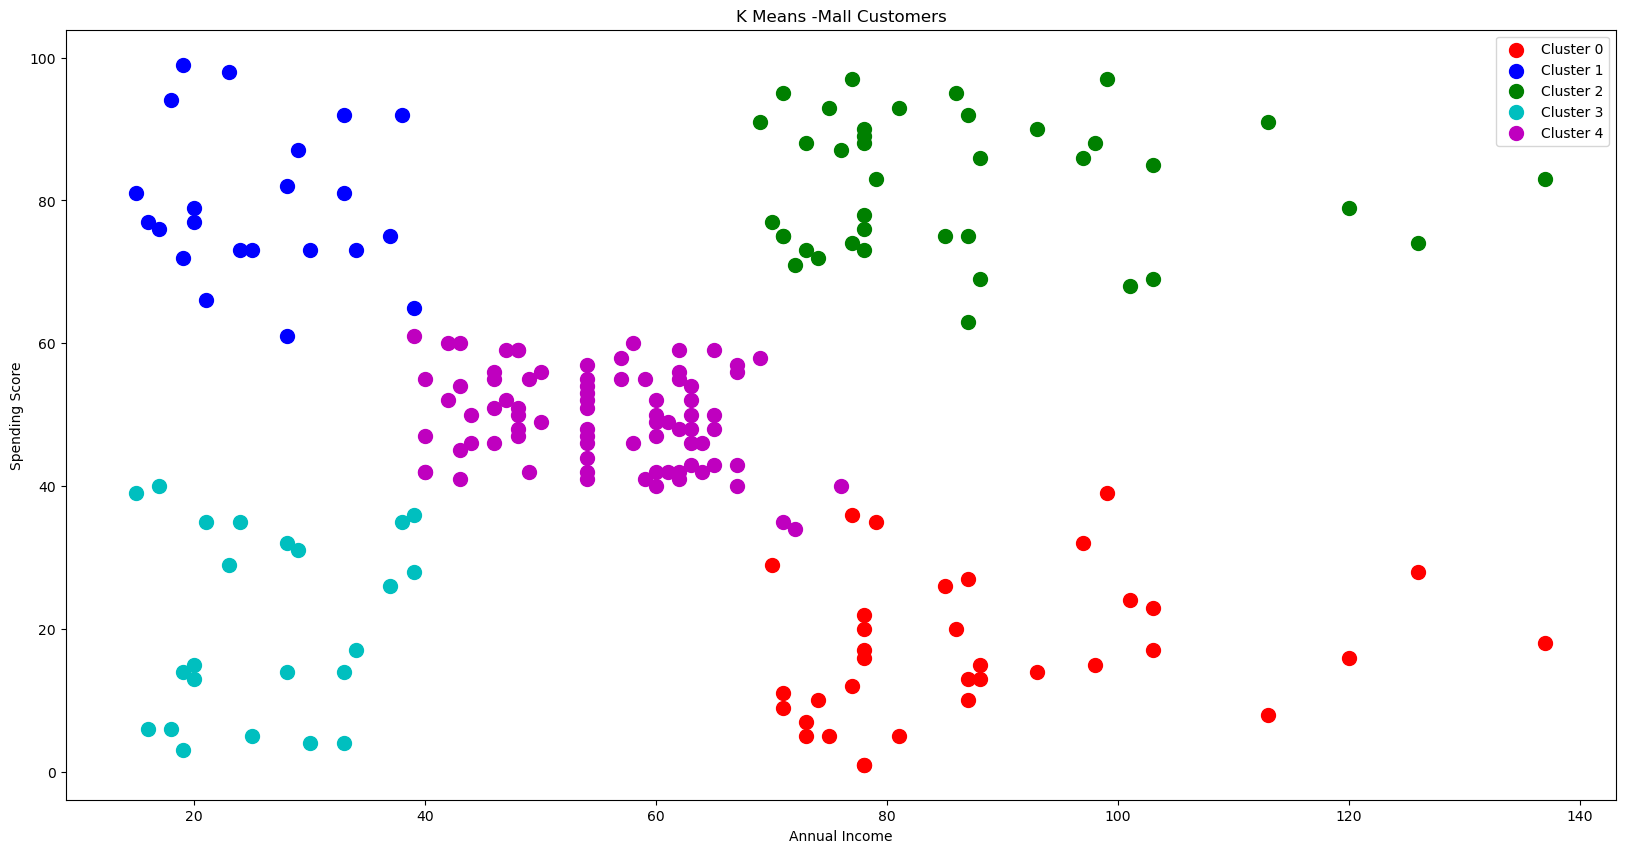

In [9]:

print('Number of Records in each Cluster' ,display (pd.DataFrame(y_kmeans).value_counts()))
plt.figure(figsize=(20, 10))
plt.scatter (x[y_kmeans == 0,0],x[y_kmeans == 0,1] ,s = 100, c='r', label = 'Cluster 0')
plt.scatter (x[y_kmeans == 1,0],x[y_kmeans == 1,1] ,s = 100, c='b', label = 'Cluster 1')
plt.scatter (x[y_kmeans == 2,0],x[y_kmeans == 2,1] ,s = 100, c='g', label = 'Cluster 2')
plt.scatter (x[y_kmeans == 3,0],x[y_kmeans == 3,1] ,s = 100, c='c', label = 'Cluster 3')
plt.scatter (x[y_kmeans == 4,0],x[y_kmeans == 4,1] ,s = 100, c='m', label = 'Cluster 4')
plt.title ('K Means -Mall Customers')
plt.xlabel ('Annual Income')
plt.ylabel ('Spending Score')
plt.legend(loc= 'upper right')
plt.show()


array([6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 2, 0, 2, 2,
       6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 7, 2, 2, 2, 2, 2,
       2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 1, 7, 1, 3, 1, 3, 1,
       7, 1, 3, 1, 3, 1, 3, 1, 3, 1, 7, 1, 3, 1, 7, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 7, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4], dtype=int32)

0
2    45
7    42
1    29
3    22
0    21
6    21
5    10
4    10
Name: count, dtype: int64

Number of Records in each Cluster None


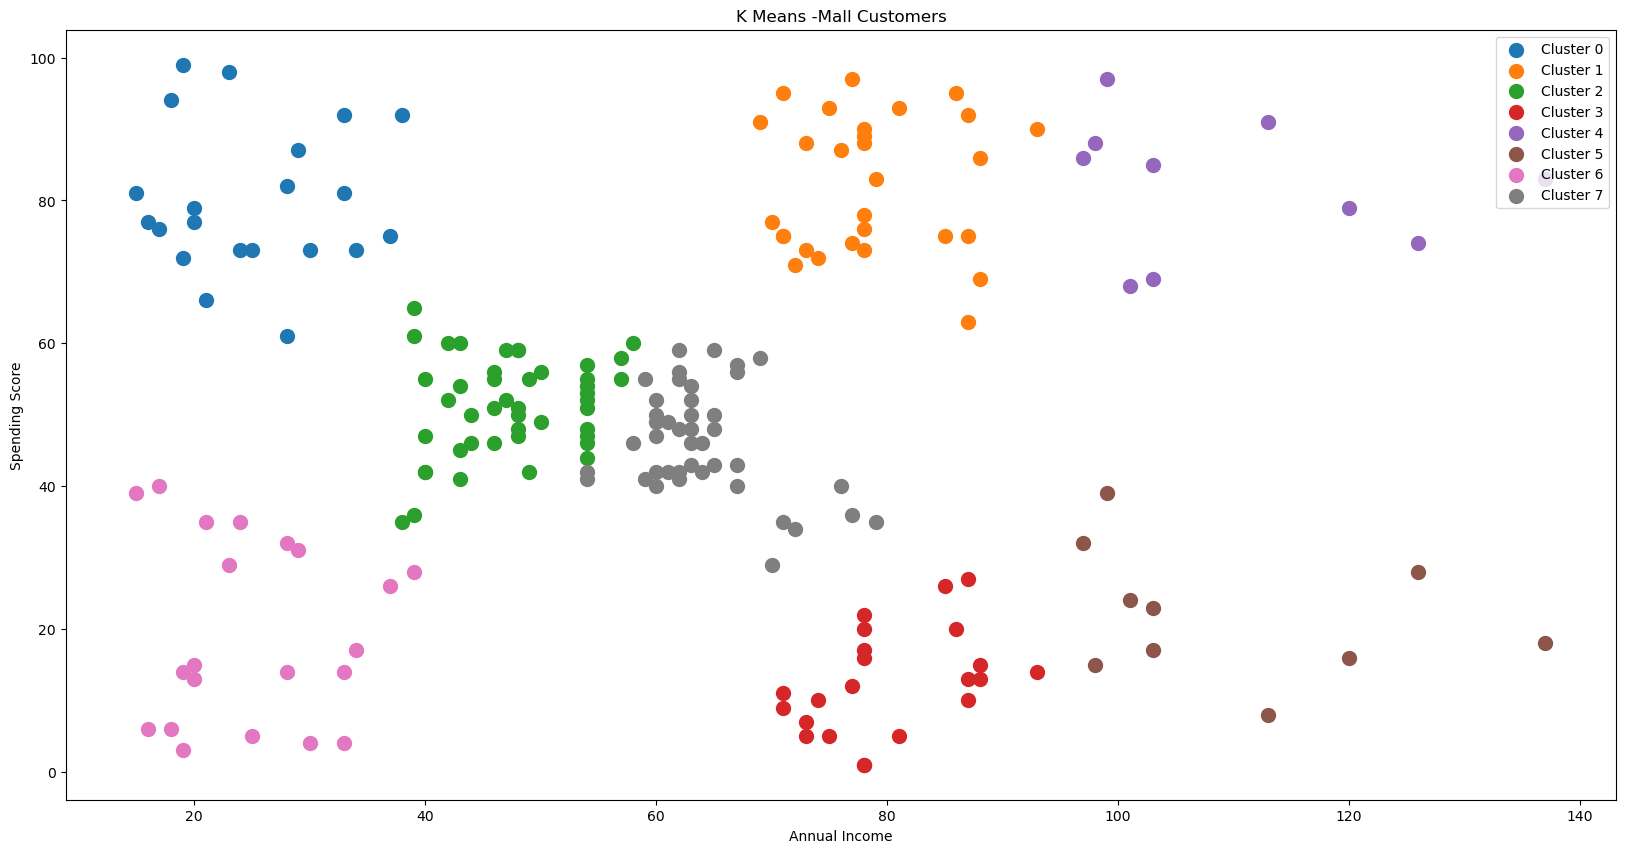

In [10]:

kmeans =  KMeans (n_clusters = 8, init = 'k-means++',n_init =100)
kmeans = kmeans.fit(x)
y_kmeans = kmeans.labels_
display (y_kmeans)
print ()
print('Number of Records in each Cluster' ,display (pd.DataFrame(y_kmeans).value_counts()))
plt.figure(figsize=(20, 10))
plt.scatter (x[y_kmeans == 0,0],x[y_kmeans == 0,1] ,s = 100)
plt.scatter (x[y_kmeans == 1,0],x[y_kmeans == 1,1] ,s = 100)
plt.scatter (x[y_kmeans == 2,0],x[y_kmeans == 2,1] ,s = 100)
plt.scatter (x[y_kmeans == 3,0],x[y_kmeans == 3,1] ,s = 100)
plt.scatter (x[y_kmeans == 4,0],x[y_kmeans == 4,1] ,s = 100)
plt.scatter (x[y_kmeans == 5,0],x[y_kmeans == 5,1] ,s = 100)
plt.scatter (x[y_kmeans == 6,0],x[y_kmeans == 6,1] ,s = 100)
plt.scatter (x[y_kmeans == 7,0],x[y_kmeans == 7,1] ,s = 100)
plt.title ('K Means -Mall Customers')
plt.xlabel ('Annual Income')
plt.ylabel ('Spending Score')
plt.legend(['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3','Cluster 4',
            'Cluster 5','Cluster 6', 'Cluster 7'], loc= 'upper right')
plt.show()


array([4, 3, 6, 3, 4, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 4, 3, 4, 3, 4, 3,
       6, 3, 6, 3, 4, 3, 4, 3, 6, 3, 6, 3, 6, 3, 6, 3, 4, 3, 4, 3, 4, 7,
       4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 0, 0, 7, 7, 7, 7,
       7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 8, 0, 2, 1, 8, 1, 8,
       0, 8, 1, 2, 1, 8, 1, 8, 1, 2, 0, 2, 1, 2, 0, 8, 1, 2, 1, 2, 1, 8,
       1, 2, 1, 8, 1, 8, 0, 2, 1, 2, 1, 8, 1, 2, 1, 8, 1, 8, 1, 2, 1, 2,
       1, 8, 1, 2, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5,
       9, 5], dtype=int32)

0
0    43
7    42
1    22
3    21
2    15
8    14
6    12
4    11
5    10
9    10
Name: count, dtype: int64

Number of Records in each Cluster None


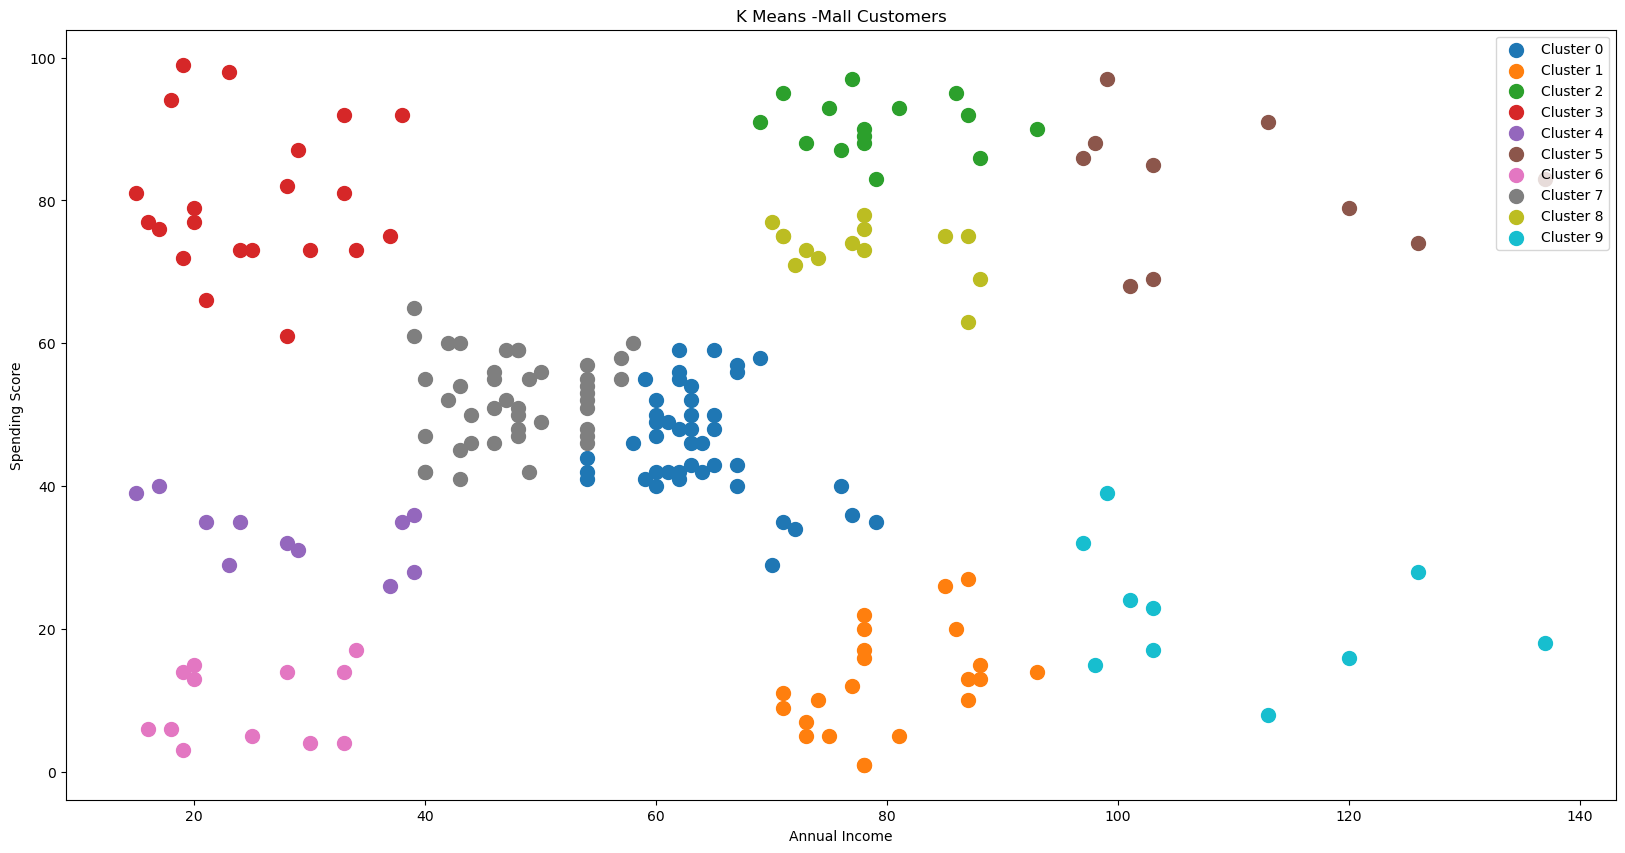

In [11]:

kmeans =  KMeans (n_clusters =  10 , init = 'k-means++',n_init =100)
kmeans = kmeans.fit(x)
y_kmeans = kmeans.labels_
display (y_kmeans)
print ()
print('Number of Records in each Cluster' ,display (pd.DataFrame(y_kmeans).value_counts()))
plt.figure(figsize=(20, 10))
plt.scatter (x[y_kmeans == 0,0],x[y_kmeans == 0,1] ,s = 100)
plt.scatter (x[y_kmeans == 1,0],x[y_kmeans == 1,1] ,s = 100)
plt.scatter (x[y_kmeans == 2,0],x[y_kmeans == 2,1] ,s = 100)
plt.scatter (x[y_kmeans == 3,0],x[y_kmeans == 3,1] ,s = 100)
plt.scatter (x[y_kmeans == 4,0],x[y_kmeans == 4,1] ,s = 100)
plt.scatter (x[y_kmeans == 5,0],x[y_kmeans == 5,1] ,s = 100)
plt.scatter (x[y_kmeans == 6,0],x[y_kmeans == 6,1] ,s = 100)
plt.scatter (x[y_kmeans == 7,0],x[y_kmeans == 7,1] ,s = 100)
plt.scatter (x[y_kmeans == 8,0],x[y_kmeans == 8,1] ,s = 100)
plt.scatter (x[y_kmeans == 9,0],x[y_kmeans == 9,1] ,s = 100)
plt.title ('K Means -Mall Customers')
plt.xlabel ('Annual Income')
plt.ylabel ('Spending Score')
plt.legend(['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6',
            'Cluster 7','Cluster 8','Cluster 9'], loc= 'upper right')
plt.show()



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

0
1    123
2     39
0     38
Name: count, dtype: int64

Number of Records in each Cluster None


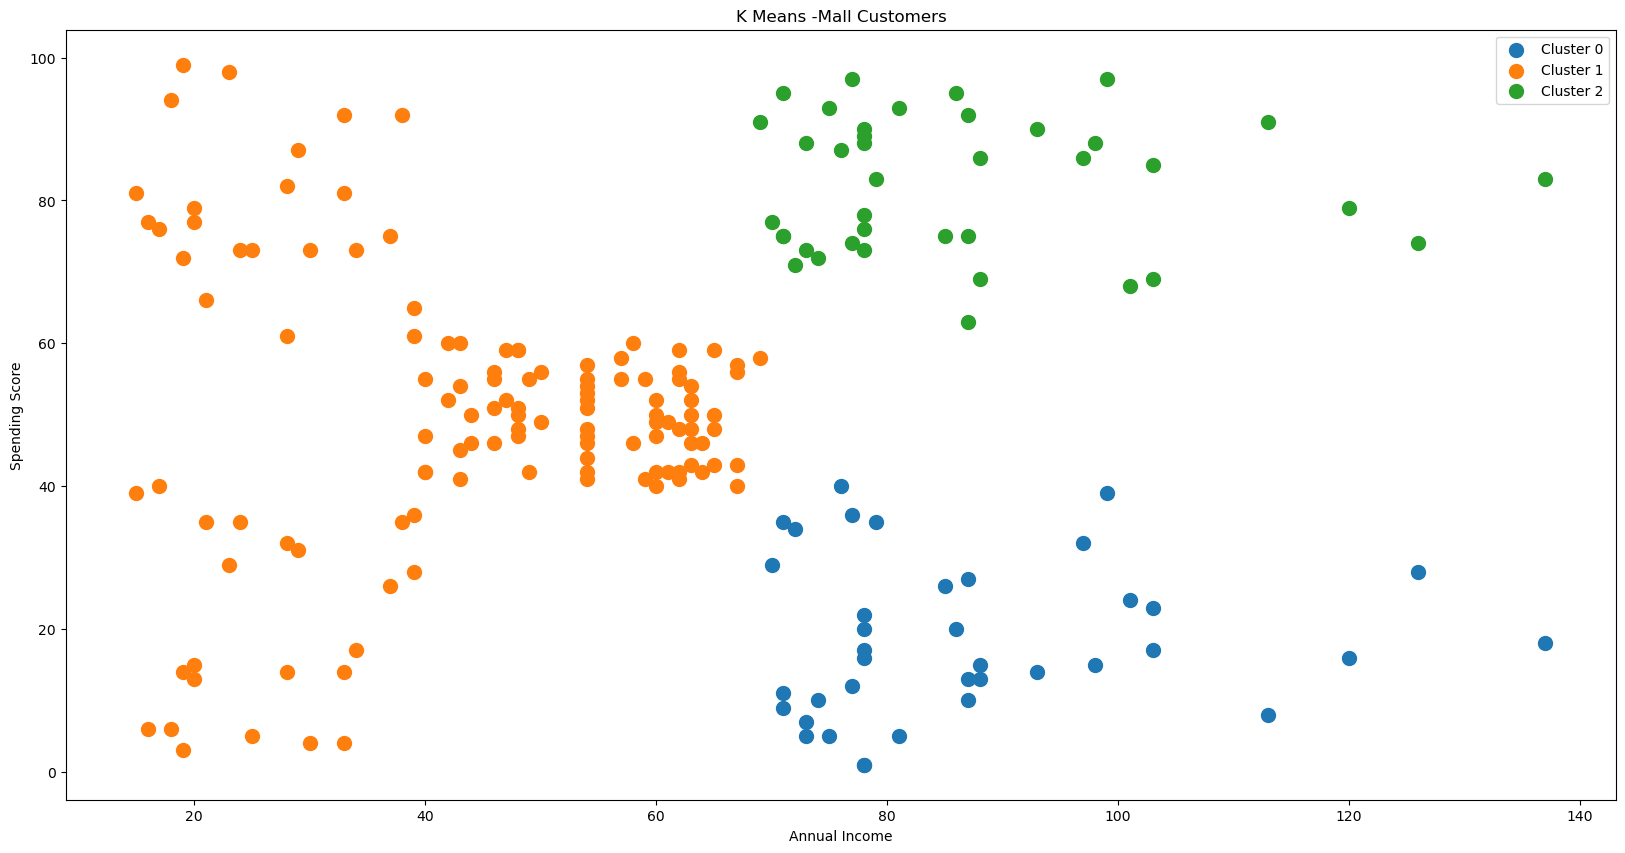

In [12]:

kmeans =  KMeans (n_clusters =  3 , init = 'k-means++',n_init =100)
kmeans = kmeans.fit(x)
y_kmeans = kmeans.labels_
display (y_kmeans)
print ()

print('Number of Records in each Cluster' ,display (pd.DataFrame(y_kmeans).value_counts()))
plt.figure(figsize=(20, 10))
plt.scatter (x[y_kmeans == 0,0],x[y_kmeans == 0,1] ,s = 100)
plt.scatter (x[y_kmeans == 1,0],x[y_kmeans == 1,1] ,s = 100)
plt.scatter (x[y_kmeans == 2,0],x[y_kmeans == 2,1] ,s = 100)
plt.title ('K Means -Mall Customers')
plt.xlabel ('Annual Income')
plt.ylabel ('Spending Score')
plt.legend(['Cluster 0', 'Cluster 1','Cluster 2'], loc= 'upper right')
plt.show()


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

0
1    110
0     90
Name: count, dtype: int64

Number of Records in each Cluster None


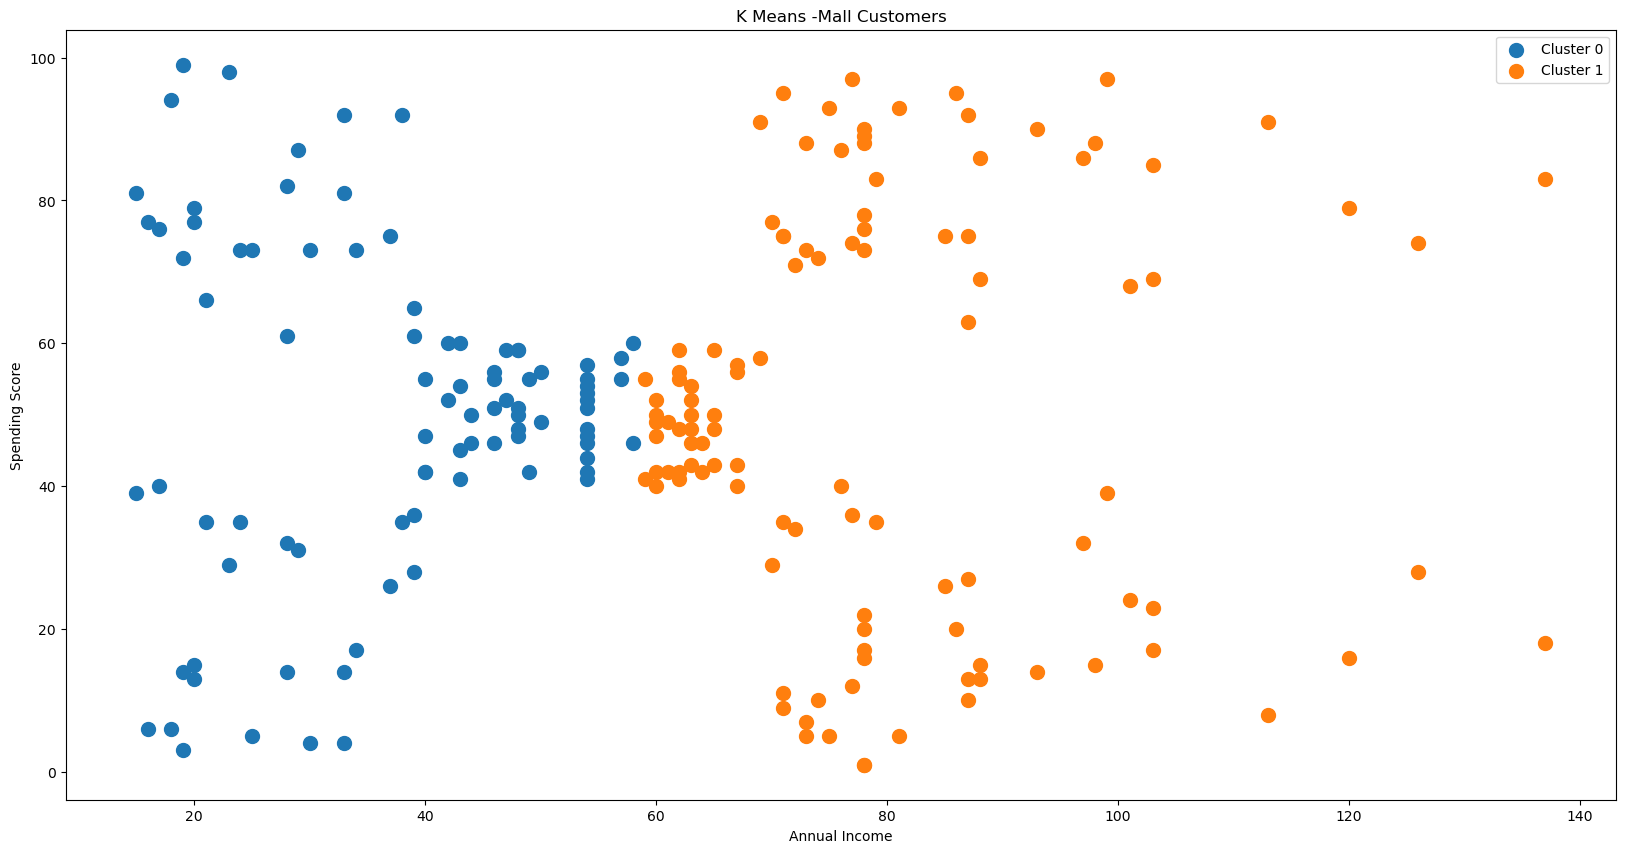

In [13]:


kmeans =  KMeans (n_clusters =  2 , init = 'k-means++',n_init =100)
kmeans = kmeans.fit(x)
y_kmeans = kmeans.labels_
display (y_kmeans)
print ()
print('Number of Records in each Cluster' ,display (pd.DataFrame(y_kmeans).value_counts()))
plt.figure(figsize=(20, 10))
plt.scatter (x[y_kmeans == 0,0],x[y_kmeans == 0,1] ,s = 100)
plt.scatter (x[y_kmeans == 1,0],x[y_kmeans == 1,1] ,s = 100)
plt.title ('K Means -Mall Customers')
plt.xlabel ('Annual Income')
plt.ylabel ('Spending Score')
plt.legend(['Cluster 0', 'Cluster 1'], loc= 'upper right')
plt.show()

